# Визуализация

In [16]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
df = pd.read_csv('../data/bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## В разрезе признаков

### Количественные

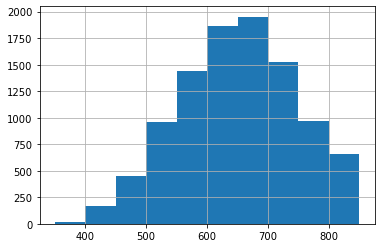

In [14]:
df["CreditScore"].hist();

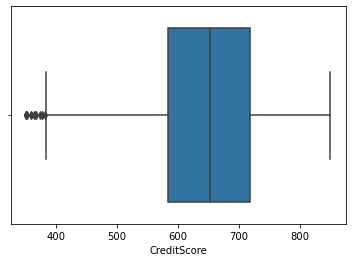

In [22]:
sns.boxplot(x = df["CreditScore"]);

In [24]:
df.drop(['RowNumber'],axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>],
       [<AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

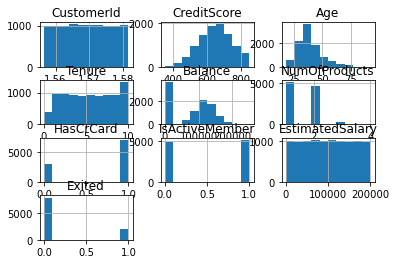

In [25]:
df.hist()

### Категориальные (в т.ч. бинарные)

In [30]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

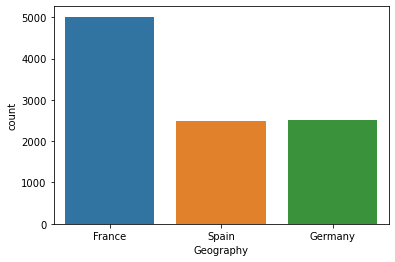

In [28]:
sns.countplot(x=df["Geography"])

<AxesSubplot:xlabel='Tenure', ylabel='count'>

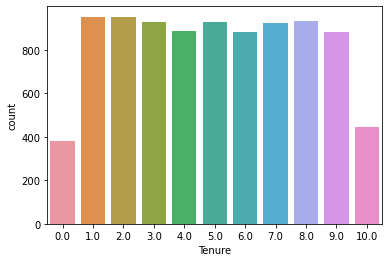

In [31]:
sns.countplot(x=df["Tenure"])

## Взаимодействия признаков

### Количественные к количественным

In [44]:
num_cols = [col for col in df.columns if (df[col].dtype == "int64") | (df[col].dtype == "float64")]

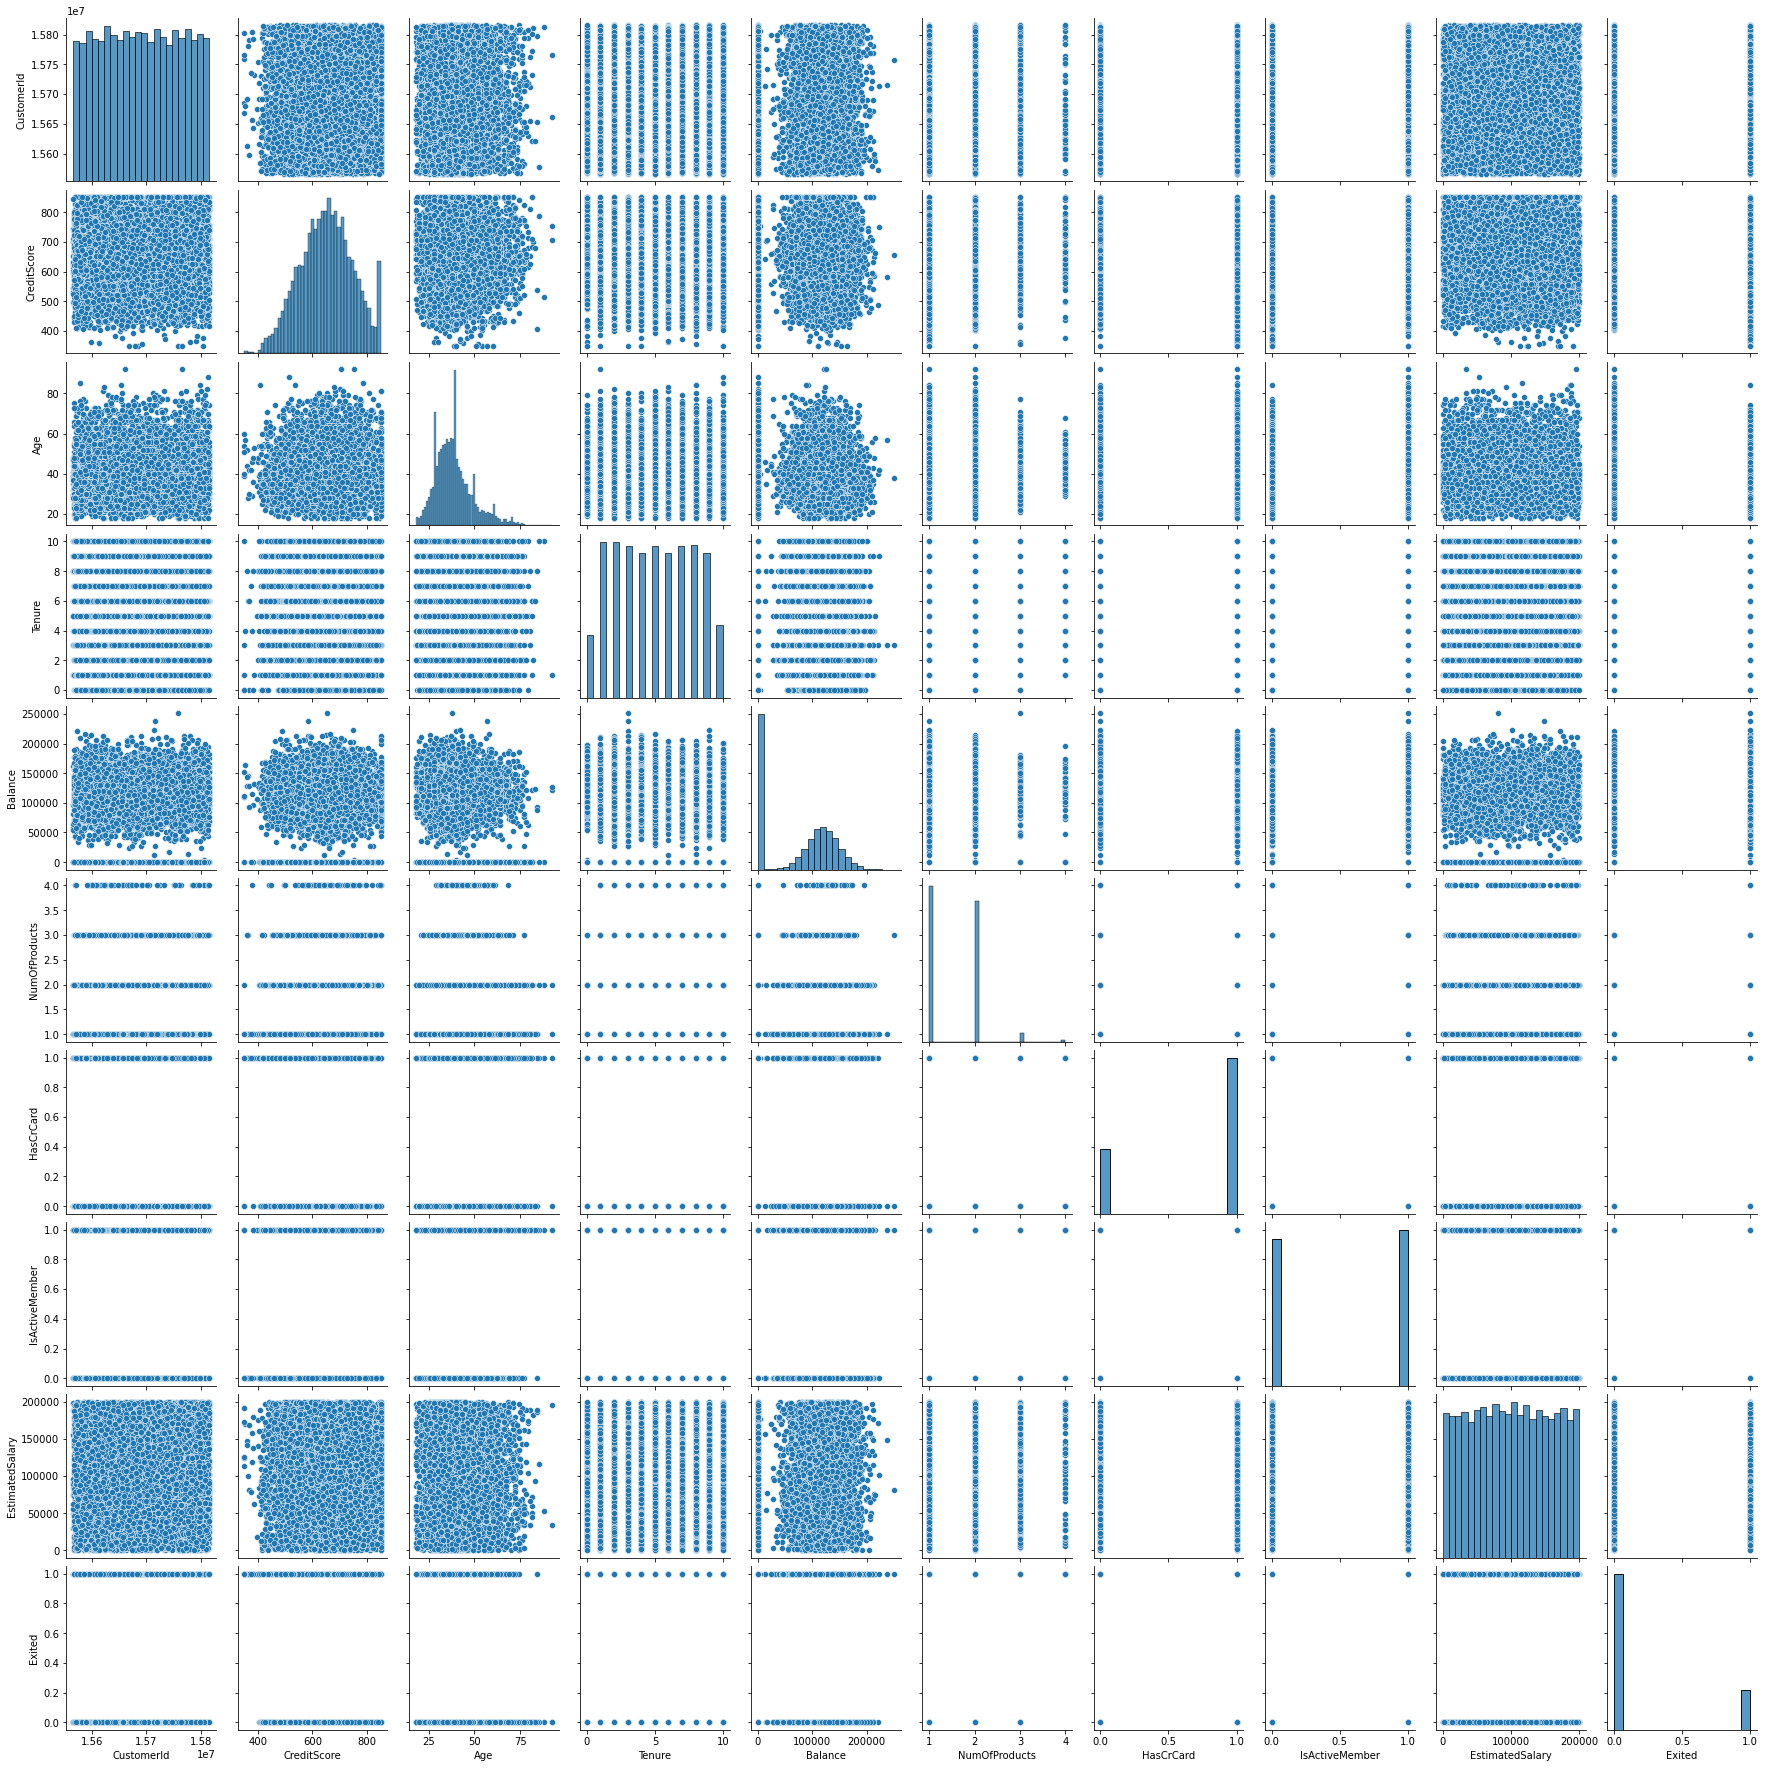

In [46]:
sns.pairplot(df[num_cols])

In [62]:
exited_clients = df[df['Exited']==1]
loyal_clients = df[df['Exited']==0]

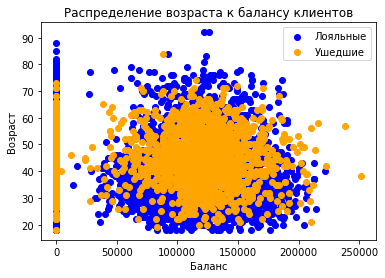

In [64]:
plt.scatter(loyal_clients['Balance'], loyal_clients['Age'], color="Blue", label="Лояльные")
plt.scatter(exited_clients['Balance'], exited_clients['Age'], color="Orange", label="Ушедшие")
plt.xlabel('Баланс')
plt.ylabel('Возраст')
plt.legend()
plt.title('Распределение возраста к балансу клиентов');

<AxesSubplot:>

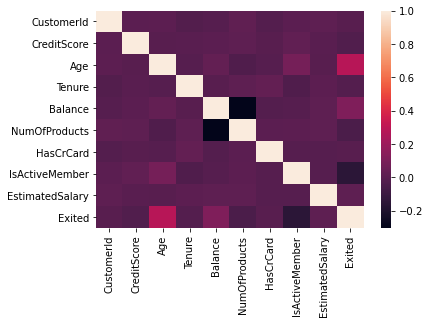

In [66]:
sns.heatmap(df.corr())

### Количественные к категориальным

<AxesSubplot:xlabel='Exited', ylabel='Age'>

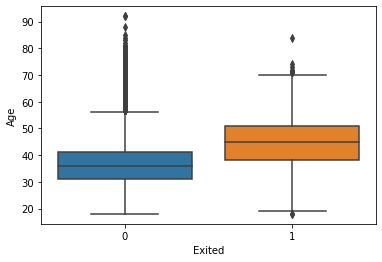

In [69]:
sns.boxplot(x="Exited",y="Age",data=df)

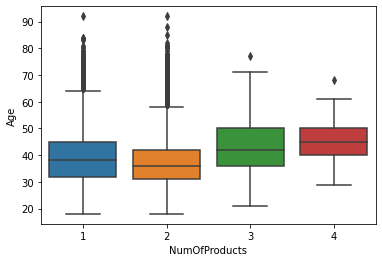

In [71]:
sns.boxplot(x="NumOfProducts",y="Age",data=df);

### Категориальные к категориальным

In [73]:
pd.crosstab(df['Exited'],df['Gender'])

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


<AxesSubplot:xlabel='Exited', ylabel='count'>

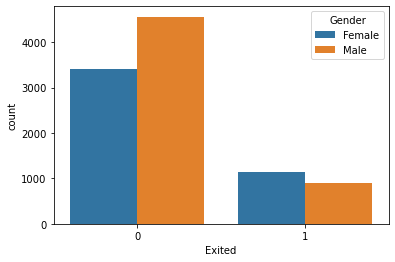

In [74]:
sns.countplot(x=df['Exited'],hue=df['Gender'], data=df)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

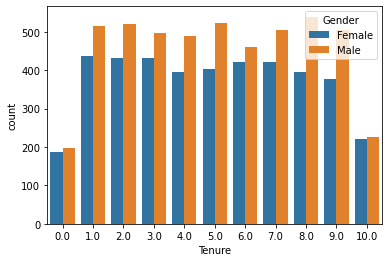

In [75]:
sns.countplot(x=df['Tenure'],hue=df['Gender'], data=df)

## Прочее (t-SNE)

In [76]:
from sklearn.manifold import TSNE

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


In [78]:
tsne = TSNE(random_state = 0)

In [84]:
df_dummies = pd.get_dummies(df['Geography'])

In [90]:
df = pd.concat([df, df_dummies],axis=1)

In [92]:
df.drop(['CustomerId','Surname','Geography'],axis=1,inplace=True)
df['Gender']=df['Gender'].map({'Female':1, 'Male':0})

In [93]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2.0,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1.0,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


In [99]:
df[df['Tenure'].isna()]=0

In [102]:
tsne.fit(df)

TSNE(random_state=0)

In [104]:
tsne.embedding_.shape

(10000, 2)

In [110]:
df['Exited']==1

0        True
1       False
2        True
3       False
4       False
        ...  
9995    False
9996    False
9997     True
9998     True
9999    False
Name: Exited, Length: 10000, dtype: bool

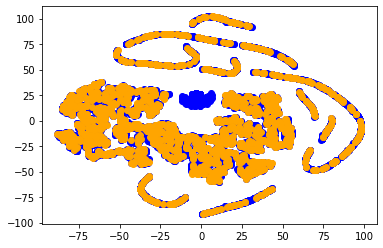

In [111]:
plt.scatter(tsne.embedding_[df['Exited']==0,0],tsne.embedding_[df['Exited']==0,1], color="blue")
plt.scatter(tsne.embedding_[df['Exited']==1,0],tsne.embedding_[df['Exited']==1,1], color="orange")

🛠 Построить распределение кредитного балла (CreditScore) клиента к балансу клиента (Balance), обозначить ушедших и лояльных клиентов

In [1]:
# Ваш код здесь

🛠 Как кредистный скоринг клиента (CreditScore) зависит от наличия кредитной карты клиента (HasCrCard)? Постройте boxplot.

In [ ]:
# Ваш код здесь

🛠 Как срок владения счётом (Tenure) влияет на страну клиента (Geography)? Постройте сountplot

In [ ]:
# Ваш код здесь